## Πανεπιστήμιο Δυτικής Αττικής
## Τμήμα Βιομηχανικής Σχεδίασης και Παραγωγής

### ΝΙΚΟ ΓΚΑΡΡΟ 

<br>
<br>

### Πρόβλεψη δημοτικότητας τραγουδίων 

**Σκοπός:** είναι να προβλεψούμε πόσο δημοφιλής (song popularity) είναι ένα τραγούδι με βάση ένα σύνολο δεδομένων με  παρατηρήσεις και 15 χαρακτηριστήκα.

Πηγή δεδομένων M Yasser H https://www.kaggle.com/yasserh/song-popularity-dataset 

### Γενικό πλαίσιο 

Οι άνθρωποι έχουν συνδεθεί σε μεγάλο βαθμό με τα τραγούδια και τη μουσική. Μπορεί να βελτιώσει τη διάθεση, να μειώσει τον πόνο και το άγχος και να διευκολύνει τις ευκαιρίες για συναισθηματική έκφραση. Έρευνες δείχνουν ότι η μουσική μπορεί να ωφελήσει τη σωματική και ψυχική μας υγεία με πολλούς τρόπους.

Τελευταία, πολλές μελέτες έχουν πραγματοποιηθεί για την κατανόηση των τραγουδιών και τη δημοτικότητά τους με βάση ορισμένους παράγοντες. Τέτοια δείγματα τραγουδιών αναλύονται και οι παράμετροί τους καταγράφονται σε πίνακα. Η πρόβλεψη της δημοτικότητας του τραγουδιού είναι ο κύριος στόχος.

Το έργο είναι απλό αλλά περίπλοκο, για να προβλέψει κανείς τη δημοτικότητα του τραγουδιού με βάση την ενέργεια, την ακουστική, τη ζωντάνια, τη χορευτικότητα κ.λπ. Το σύνολο δεδομένων είναι μεγάλο και η πολυπλοκότητά του οφείλεται στο γεγονός ότι έχει έντονη πολυσυγγραμμικότητα.

### Πληροφορίες χαρακτηριστήκων 
- song_name : Ονομα τραγουδίου 
- song_popularity : Δημοτικότητα τραγουδιού[0-100] 0-min 100-max
- song_duration_ms : Δίαρκεια τραγουδιού[ms]
- acousticness : ακουστικότητα [0-1]
- danceability : Χορεύτικότητα τραγουδίου [0-0.99]
- energy : Μέτρο της έντασης και της δραστηριότητας, τα ενεργητικά κομμάτια είναι γρήγορα, δυνατά και θορυβώδη. [0-1]
- instrumentalness : Δείχνει εάν ένα τραγούδει δεν περιέχει φωνητικά [0-1]
- key : Αριθμός μουσικών κλειδιών [0-11] (διακριτή τιμή)
- liveness : Η παρουσία κοινού στην ηχογράφηση του τραγουδίου [0.01-0.99]
- loudness : Επίπεδα θορύβου τραγουδίου [dB]
- audio_mode : Υποδεικνύει τον τύπο της κλίμακας από την οποία προέρχεται η μελωδικότητα του τραγουδείου [0:minor,1:major] (διακριτή τιμή)
- speechiness : Δείχνει το ποσό ομιλείας (φωνητικών χορδών) [0-0.94]
- tempo : Ο συνολικός εκτιμώμενος ρυθμός ενός κομματιού σε ρυθμούς ανά λεπτό [BPM]
- time_signature : Η υπογραφή χρόνου υποδεικνύει πόσα beats υπάρχουν σε κάθε bar(or measure)[0-5] (διακριτή τιμή)
- audio_valence : Περιγράφει τη μουσική θετικότητα που μεταδίδεται από ένα τραγούδει οσό πιο μεγάλες τιμές τόσο πιο θετικό είναι ένα τραγούδει [0-0.98] 

Το Datαset έχει 3 χαρακτηριστικά με διακριτές τιμές και 11  χαρακτηριστικά με συνεχείς τιμές.

# Μελέτη δεδομένων

### Κλήση των απαραίτητων βιβλιόθηκων 

In [43]:
import pandas as pd  # χρήση συντομογραφίας "pd" για ευκολία 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<br>

## Εισαγωγή και μελέτη δεδομένων (data exploration)

#### Εισαγωγή αρχείου δεδομένων τύπου csv

In [44]:
data=pd.read_csv('../input/song-popularity-dataset/song_data.csv')

##### Εμφάνιση διαστάσεων πίνακα γραμμές=δείγματα,στήλες=χαρακτηριστικά

In [45]:
data.shape

(18835, 15)

#### Εμφάνιση των 5 πρώτων γραμμών δεδομένων 

In [46]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


Εμφάνιση όλων των δειγμάτων  

In [47]:
data.head(18835)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


##### Εμφάνιση στατιστικών στοιχείων δεδομένων

In [48]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [49]:
data.describe(include='all')  # με το include='all' εμφανίζονται και οι μη αριθμητικές τιμές

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
unique,13070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Better,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,NaN,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,NaN,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,NaN,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,NaN,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000


##### Εμφάνιση ονομάτος στηλών (χαρακτηριστικών)

In [50]:
data.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

##### Εμφάνιση δεικτών, αρίθμηση δειγμάτων

In [51]:
data.index

RangeIndex(start=0, stop=18835, step=1)

##### Πληροφορίες για τους τύπους δεδομένων

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [53]:
data.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

#### Καταμέτρηση στοιχείων ανά χαρακτηριστικό

In [54]:
data.count()

song_name           18835
song_popularity     18835
song_duration_ms    18835
acousticness        18835
danceability        18835
energy              18835
instrumentalness    18835
key                 18835
liveness            18835
loudness            18835
audio_mode          18835
speechiness         18835
tempo               18835
time_signature      18835
audio_valence       18835
dtype: int64

#### Καταγραφή μοναδικών τιμών ανά χαρακτηριστικό

In [55]:
cols = data.columns
for i in cols:
    print(i)
    print(data[i].unique())

song_name
['Boulevard of Broken Dreams' 'In The End' 'Seven Nation Army' ...
 'Sudden Love (Acoustic)' 'Gentle on My Mind' 'Up to Me']
song_popularity
[ 73  66  76  74  56  80  81  78  63  75  69  77  71  62  79  13  28  11
  65  70  60  72  57  64  61  67  94  98  59  87  85  58  92  83  44  47
  54  49  52  95  45  38  46  53  39  88  68  37  43  84  40  41  10  31
  48  24  29  51   4   7  50  42  30  21  55  14  33   8  16  34  26  15
  19   5   3  22  36  32  35   9  82  25  86  12  18  27  17   6  20   0
  90  93  91  89  99  97  96   1   2  23 100]
song_duration_ms
[262333 216933 231733 ... 182211 352280 193533]
acousticness
[0.00552  0.0103   0.00817  ... 0.000686 0.00798  0.000725]
danceability
[0.496  0.542  0.737  0.451  0.447  0.316  0.581  0.613  0.33   0.629
 0.647  0.618  0.42   0.278  0.659  0.37   0.567  0.545  0.309  0.276
 0.518  0.58   0.602  0.657  0.44   0.38   0.217  0.714  0.582  0.614
 0.509  0.498  0.599  0.574  0.433  0.549  0.656  0.499  0.624  0.374
 0.695 

#### Έλεγχος για τιμές που δεν έχουν καταγραφή

In [56]:
data.isnull().any()

song_name           False
song_popularity     False
song_duration_ms    False
acousticness        False
danceability        False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
audio_mode          False
speechiness         False
tempo               False
time_signature      False
audio_valence       False
dtype: bool

#### Καταμέτρηση εγγραφών χωρίς τιμές

In [57]:
data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

#### Καθορισμός Χαρακτηριστικών

In [58]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness','loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature','audio_valence']
target= ['song_popularity']

<br>
<br>

# Γραφήματα με τη βιβλιοθήκη Matplotlib

H  Matplotlib είναι μια βιβλιοθήκη σχεδίασης 2D που παράγει γραφικά ποιότητας δημοσίευσης σε διάφορες μορφές.  Με λίγες γραμμές κώδικα δημιουργεί ιστογράμματα, γραφήματα ισχύος, ραβδογράμματα, γραφήματα διασποράς και άλλα 

<br>
<br>

### Ιστόγραμμα
Το
ύψος
της
κάθε
στήλης
σχεδιάζεται
με
τέτοιο
τρόπο
ώστε
εμβαδό
της
να
είναι
ίσο
με
την
συχνότητα
της
τιμής
στην
οποία
αναφέρεται

### Ιστόγραμμα μεταβλητών εισόδου

array([[<AxesSubplot:title={'center':'song_duration_ms'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'audio_mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>],
       [<AxesSubplot:title={'center':'audio_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

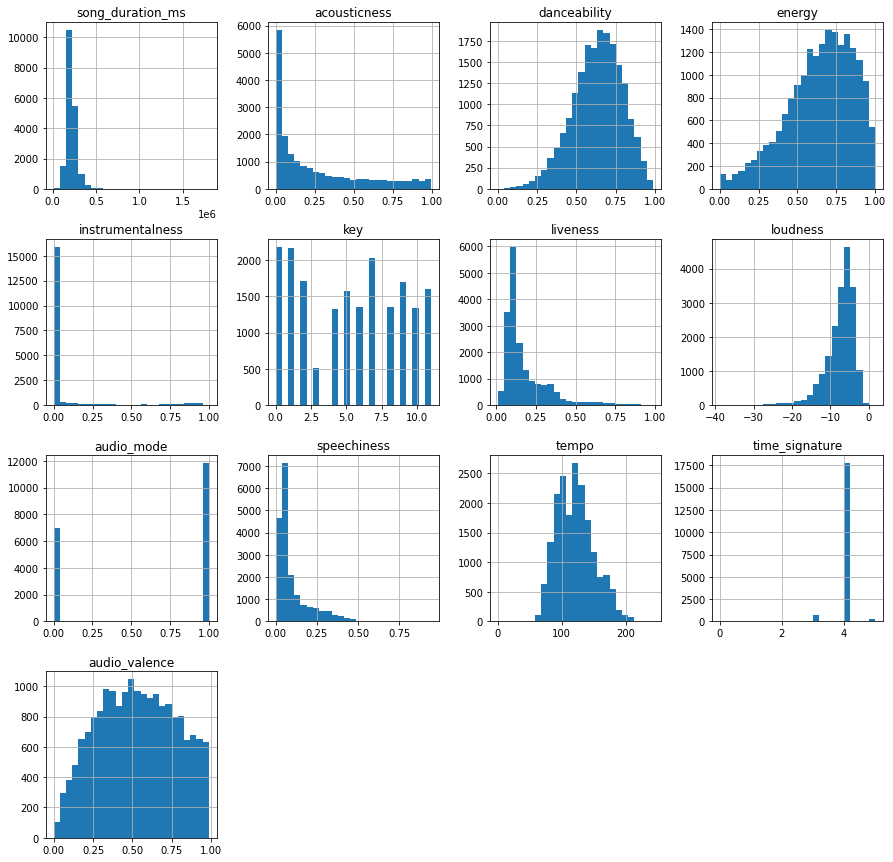

In [59]:
data[features].hist(bins=25, figsize=(15, 15))

### Ιστόγραμμα μεταβλητής εξόδου


array([[<AxesSubplot:title={'center':'song_popularity'}>]], dtype=object)

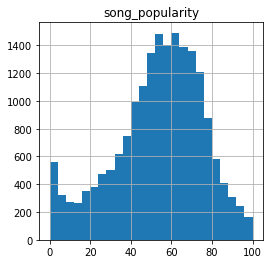

In [60]:
data[target].hist(bins=25, figsize=(4, 4))

### Διάγραμμα διασποράς κάθε εισόδου με την έξοδο

In [61]:
data.iloc[:,1:15] # iloc= επιλέγω στήλες με τον ακέραιο (i=integer) αριθμό θέσης (loc=location)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


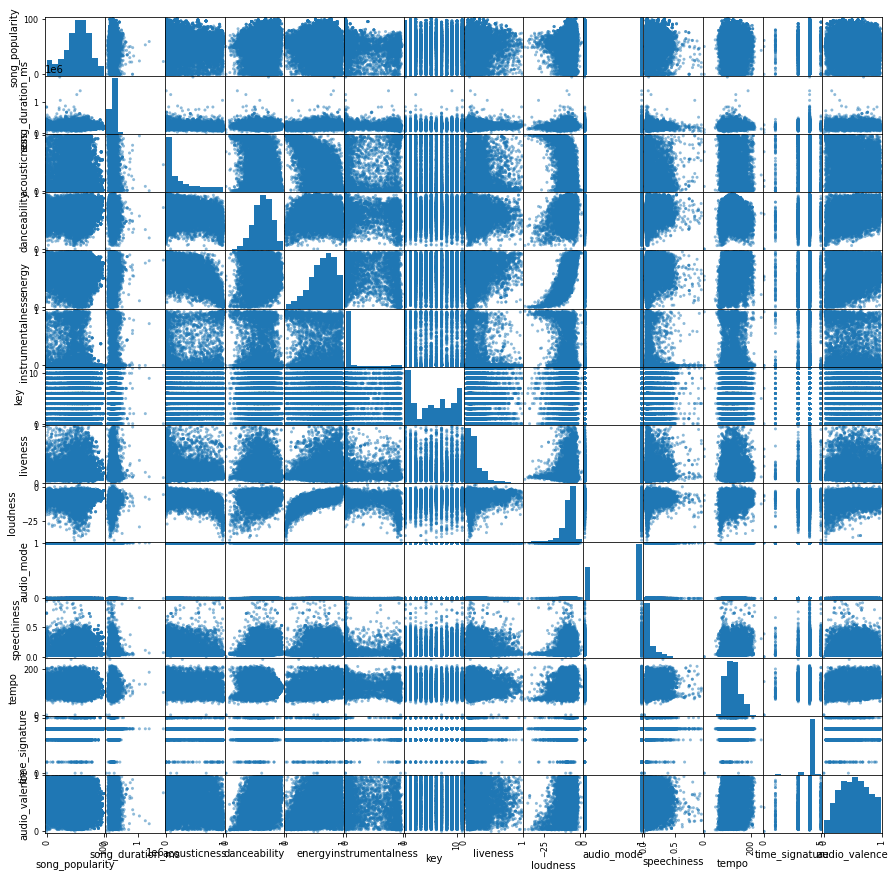

In [62]:
pd.plotting.scatter_matrix(data.iloc[:,1:15], figsize=(15, 15));

#### Διάγραμμα διασποράς με τη βιβλιοθήκη Seaborn

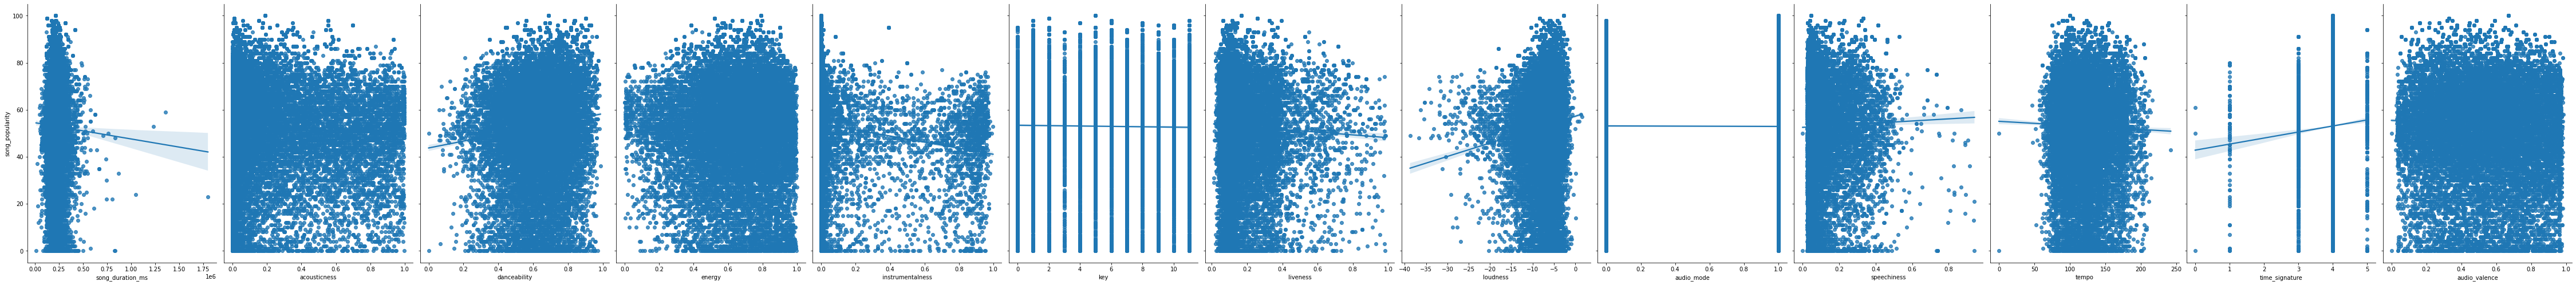

In [63]:
sns.pairplot(data, x_vars=['song_duration_ms', 'acousticness', 'danceability', 'energy','instrumentalness','key','liveness','loudness','audio_mode','speechiness','tempo','time_signature','audio_valence'], y_vars='song_popularity', height=7, aspect=0.7, kind='reg')

**Πίνακας συσχέτισης (Correlation matrix)**

<AxesSubplot:>

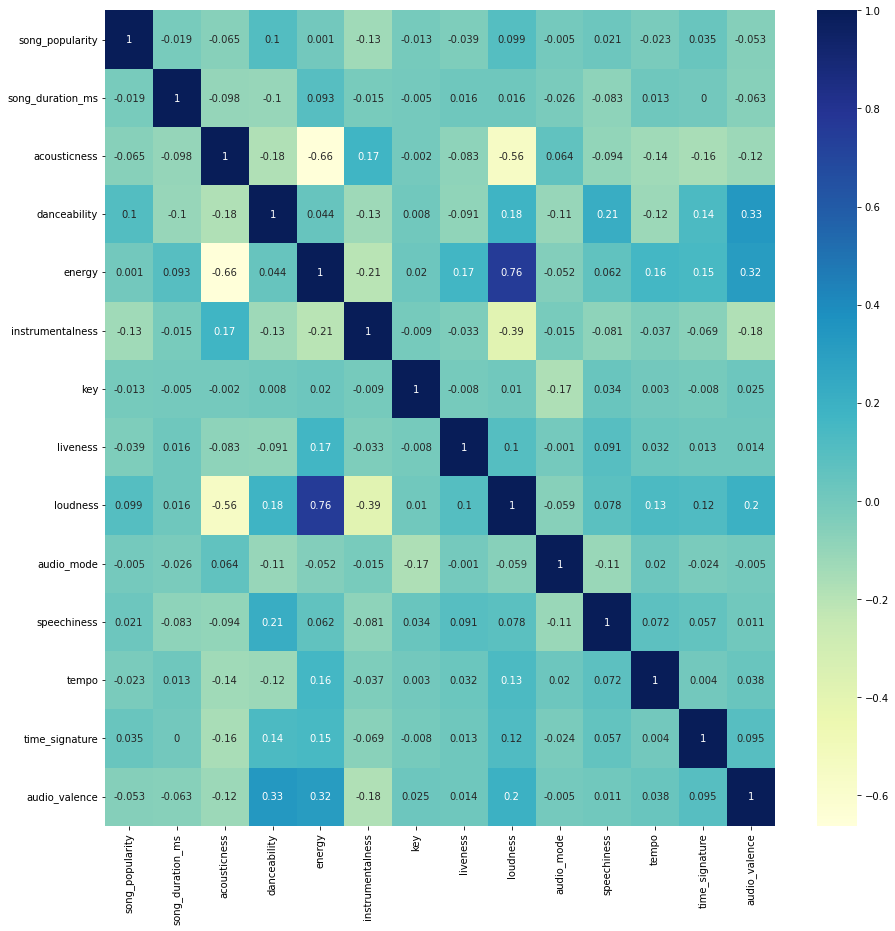

In [64]:
# Πίνακας συσχέτισης για ζευγάρια χαρακτηριστικών  
correlation_matrix = data.iloc[:,1:15].corr().round(3)
f, ax = plt.subplots(figsize=(15,15))
#### Χρήση απεικόνισης μορφής heatmap της βιβλιοθήκης seaborn 
sns.heatmap(data=correlation_matrix, annot=True,cmap='YlGnBu')

<br>
<br>
<br>

# Διαχωρισμός σε δεδομένα εκπαίδευσης και δεδομένα ελέγχου

Δηλώστε στη μεταβλητή `Χ` τα χαρακτηριστικά που θα χρησιμοποιηθούν ως είσοδοι στο μοντέλο και στη μεταβλητή `y` τη στήλη με τις ετικέτες (μέσα πρόβλεψης) για κάθε δείγμα ως έξοδο του μοντέλου.

In [65]:
X=data[features]
X.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [66]:
X.shape

(18835, 13)

In [67]:
y=data.song_popularity
y.head()

0    73
1    66
2    76
3    74
4    56
Name: song_popularity, dtype: int64

In [68]:
y.shape

(18835,)

Χρησιμοποιούμε το εργαλείο της βιβλιοθήκης Scikit-learn ``train_test_split`` για να μοιράσουμε τα δεδομένα σε εκπαίδευσης και δεδομένα ελέγχου 

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=19)

In [70]:
print("X_train διαστάσεις:", X_train.shape)
print("y_train διαστάσεις:", y_train.shape)

print("X_test διαστάσεις:", X_test.shape)
print("y_test διαστάσεις:", y_test.shape)

X_train διαστάσεις: (13184, 13)
y_train διαστάσεις: (13184,)
X_test διαστάσεις: (5651, 13)
y_test διαστάσεις: (5651,)


In [71]:
X_train

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18122,311866,0.007280,0.625,0.726,0.000000,10,0.3180,-7.731,0,0.1550,103.980,4,0.483
479,1233666,0.078700,0.345,0.795,0.001650,2,0.1800,-7.440,1,0.1080,134.141,4,0.189
18328,223546,0.004870,0.554,0.772,0.000007,7,0.3540,-4.821,0,0.0418,179.984,4,0.455
6341,273541,0.239000,0.636,0.702,0.000000,3,0.0809,-7.530,0,0.0845,82.034,4,0.775
5656,194106,0.395000,0.490,0.631,0.000000,7,0.0645,-4.386,1,0.0335,85.898,4,0.796
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6452,187053,0.000101,0.564,0.778,0.006820,9,0.0661,-6.763,1,0.0369,120.012,4,0.616
1043,132306,0.417000,0.566,0.804,0.000000,6,0.1120,-5.783,1,0.0364,149.989,4,0.858
1378,170216,0.814000,0.628,0.248,0.060200,1,0.1110,-13.304,1,0.0320,125.298,4,0.646
17141,204150,0.014200,0.746,0.825,0.010700,1,0.1210,-4.666,1,0.1690,152.914,4,0.584


# **Εκπαίδευση μοντέλου παλινδρόμησης**

### 1. Εισαγωγή βιβλιοθήκης οικογένειας αλγορίθμων

In [72]:
from sklearn.linear_model import LinearRegression

### 2. Ορισμός μοντέλου και επιλογή συγκεκριμένου αλγόριθμου μάθησης 

In [73]:
linregressor = LinearRegression()
#linregressor?

### 3. Εκπαίδευση μοντέλου

In [74]:
linregressor.fit(X_train, y_train)

LinearRegression()

In [75]:
# Συνδυασμός ονομάτων μεταβλητών κ μεταβλητών
print(linregressor.intercept_)
print(linregressor.coef_)
print(X)

62.082469538672925
[-7.48473634e-06 -4.58258176e+00  1.23256101e+01 -1.19614724e+01
 -9.94630555e+00 -3.32710505e-02 -4.28317958e+00  6.81271968e-01
  7.45375767e-02 -2.61047596e+00 -1.55287048e-02  1.69970552e+00
 -7.55746878e+00]
       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000  

### 4. Αξιολόγηση μοντέλου με είσοδο τα δεδομένα ελέγχου


Έξοδος εκπαιδευμένου μοντέλου με είσοδο τα δεδομένα ελέγχου (test)

In [76]:
y_pred = linregressor.predict(X_test)

In [77]:
type(y_pred)

numpy.ndarray

# Αξιολόγηση μοντέλου  που δημιουργήθηκε με επιβλεπώμενη μάθηση

Η μεταβλητή `y_test` περιέχει τις τιμές εξόδου από το σύνολο δεδομένων ελέγχου `test` και η μεταβλητή `y_pred` το διάνυσμα με τις εξόδους του μοντέλου με είσοδο το διάνυσμα `y_test`
<br>
<br>


## Μετρική Επίδοσης μοντέλων Παλινδρόμησης

## Μέσο Απόλυτο Σφάλμα

In [78]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)

## Μέσο Τετραγωνικό Σφάλμα

In [79]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)

## Ρίζα Μέσου Τετραγωνικού Σφάλματος

In [80]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test, y_pred, squared=False)

## R^2
Η καλύτερη τιμή είναι 1 και η χειρότερη τιμή είναι 0.

In [81]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)

In [82]:
linregressor.score(X_test, y_test)
print("Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)
print('Mean Squared Error= ', mse)
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',r2)

Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ
--------------------------------------
Mean Absolute Error=  17.09804713075465
Mean Squared Error=  461.99011655135814
Root Mean Squared Error =  21.493955349152426
R2 score =  0.04856252659361027


### Eκτίμηση της επίδοσης γενίκευσης του μοντέλου με Cross Validation 

Χρησιμοποιούμε το εργαλείο ``cross_val_score`` της βιβλιοθήκης Scikit-learn  από το module ``model_selection`` για εκτίμηση της επίδοσης γενίκευσης του μοντέλου

In [83]:
from sklearn.model_selection import cross_val_score
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None

Ορίζονται ως παράμετροι της ``cross_val_score`` ο τύπος του μοντέλου, τα δεδομένα εισόδου Χ, τα δεδομένα εξόδου y και ο αριθμός των κομματιών που θα χωριστούν τα δεδομένα (folds)

In [84]:
epidosi = cross_val_score(linregressor, X_train, y_train, scoring='r2', cv=10)
print("Επιδόσεις με Cross-validation: ",epidosi)

Επιδόσεις με Cross-validation:  [0.03556649 0.05161871 0.03619323 0.04550945 0.02330636 0.03012696
 0.04698517 0.03363951 0.06422681 0.04570277]


In [85]:
print("Μέση επίδοση με cross-validation:",epidosi.mean())

Μέση επίδοση με cross-validation: 0.04128754604134692


## Γράφημα πραγματικής εξόδου - εκτιμώμενης εξόδου

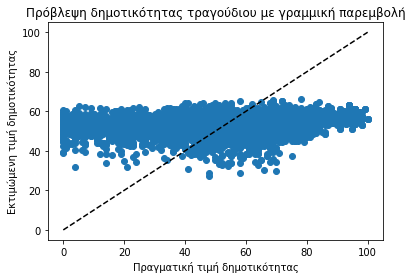

In [86]:
plt.scatter(y_test, y_pred)

plt.plot([0, 100], [0, 100], '--k')

plt.title('Πρόβλεψη δημοτικότητας τραγούδιου με γραμμική παρεμβολή')
plt.xlabel('Πραγματική τιμή δημοτικότητας')
plt.ylabel('Εκτιμώμενη τιμή δημοτικότητας')
plt.show()

### Μεταβλητές μοντέλου

In [87]:
print(linregressor.intercept_)
print(linregressor.coef_)
type(linregressor.coef_)

62.082469538672925
[-7.48473634e-06 -4.58258176e+00  1.23256101e+01 -1.19614724e+01
 -9.94630555e+00 -3.32710505e-02 -4.28317958e+00  6.81271968e-01
  7.45375767e-02 -2.61047596e+00 -1.55287048e-02  1.69970552e+00
 -7.55746878e+00]


numpy.ndarray

In [88]:
# Συνδυασμός ονομάτων μεταβλητών κ μεταβλητών
print((list(zip(features, linregressor.coef_))))

[('song_duration_ms', -7.484736340848629e-06), ('acousticness', -4.582581764770372), ('danceability', 12.325610101046175), ('energy', -11.961472426503068), ('instrumentalness', -9.946305545886739), ('key', -0.033271050500436716), ('liveness', -4.283179579217824), ('loudness', 0.6812719675004588), ('audio_mode', 0.0745375767090818), ('speechiness', -2.6104759571759084), ('tempo', -0.01552870484073443), ('time_signature', 1.6997055206836713), ('audio_valence', -7.557468780916078)]


In [89]:
print('Για κάθε 1 βαθμό song_duration_ms αυξάνεται η δημοτικότητα κατά ',(linregressor.coef_[0]),'μονάδες')
print('Για κάθε 1 βαθμό acousticness αυξάνεται η δημοτικότητα κατά ',(linregressor.coef_[1]),'μονάδες')
print('Για κάθε 1 βαθμό danceability αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[2]),'μονάδες')
print('Για κάθε 1 βαθμό energy αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[3]),'μονάδες')
print('Για κάθε 1 βαθμό instrumentalness αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[4]),'μονάδες')
print('Για κάθε 1 βαθμό key αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[5]),'μονάδες')
print('Για κάθε 1 βαθμό liveness αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[6]),'μονάδες')
print('Για κάθε 1 βαθμό loudness αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[7]),'μονάδες')
print('Για κάθε 1 βαθμό audio_mode αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[8]),'μονάδες')
print('Για κάθε 1 βαθμό speechiness αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[9]),'μονάδες')
print('Για κάθε 1 βαθμό tempo αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[10]),'μονάδες')
print('Για κάθε 1 βαθμό time_signature αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[11]),'μονάδες')
print('Για κάθε 1 βαθμό audio_valence αυξάνεται η δημοτικότητα  κατά ',(linregressor.coef_[12]),'μονάδες')

Για κάθε 1 βαθμό song_duration_ms αυξάνεται η δημοτικότητα κατά  -7.484736340848629e-06 μονάδες
Για κάθε 1 βαθμό acousticness αυξάνεται η δημοτικότητα κατά  -4.582581764770372 μονάδες
Για κάθε 1 βαθμό danceability αυξάνεται η δημοτικότητα  κατά  12.325610101046175 μονάδες
Για κάθε 1 βαθμό energy αυξάνεται η δημοτικότητα  κατά  -11.961472426503068 μονάδες
Για κάθε 1 βαθμό instrumentalness αυξάνεται η δημοτικότητα  κατά  -9.946305545886739 μονάδες
Για κάθε 1 βαθμό key αυξάνεται η δημοτικότητα  κατά  -0.033271050500436716 μονάδες
Για κάθε 1 βαθμό liveness αυξάνεται η δημοτικότητα  κατά  -4.283179579217824 μονάδες
Για κάθε 1 βαθμό loudness αυξάνεται η δημοτικότητα  κατά  0.6812719675004588 μονάδες
Για κάθε 1 βαθμό audio_mode αυξάνεται η δημοτικότητα  κατά  0.0745375767090818 μονάδες
Για κάθε 1 βαθμό speechiness αυξάνεται η δημοτικότητα  κατά  -2.6104759571759084 μονάδες
Για κάθε 1 βαθμό tempo αυξάνεται η δημοτικότητα  κατά  -0.01552870484073443 μονάδες
Για κάθε 1 βαθμό time_signature αυξάν

### Συμπεράσματα

Παρατηρούμε οτι η ακριβεί προβλέψει της δημοτικότητας ενός τραγουδίου με το μοντέλο της γραμμικής παρεμβολής είναι δυσκόλη αφού το πρόβλημα έχει υψηλή πολυσυγγραμμικότητα άρα από τις μετρικές πέρνουμε χαμηλό r^2 όμως κατά την διαδίκασία που κάναμε μπορούμε μέσο των διαγραμμάτων, ιστογραμματών και του linregressor.coef_  να πάρουμε χρήσιμες πληροφορίες για την συσχέτιση των χαρακτιριστικών, δηλαδή παρατηρούμε παραπάνω ότι ένα από τα μεγαλύτερα κριτήρια για την αύξηση της δημοτικότητας ενός τραγουδίου είναι η χορεύτικότητα του, δηλαδή ένα τραγούδι είναι χορεύτικό όταν βασίζεται σε συνδυασμό μουσικών στοιχείων, όπως το τέμπο, τη σταθερότητα του ρυθμού, τη δύναμη των παλμών και τη συνολική κανονικότητά του. Αντιθέτως, ένα από τα πιο ενδίαφέροντα χαρακτηριστικά είναι το audio_valence (η θετικότητα που μεταδίδεται από το τραγούδι) η αυξήση αυτού του μεγέθους δεν είναι απαραιτήτως σημαντικός παράγοντας για την αύξηση της δημοτικότητας, δηλαδή υπάρχουν τραγούδια που μεταδίδουν αρνητικά συναισθήματα όπως θλίψη και θυμό που είναι δημοφιλές.Το χαρακτηρίστικό energy δεν είναι ενδείκτικο της δημοτικότητας ενός τραγουδίου, αυτό οφείλεται στο ότι το τραγούδι γίνεται πιο γρήγορο αλλά και ταυτοχρόνος πιο θορυβώδες, δηλαδή η death metal έχει υψηλή ενέργεια ενώ ο Bach χαμηλή.Τα χαρακτηριστικά instrumentalness και speechiness έχουν και τα δύο αρνητική ενδείξη της δημοφιλίας ενός τραγουδίου αυτό οφείλεται διότι όσο πιο υψηλό speechiness έχει ένα τραγούδι τόσο πιο πολύ προσεγγίζει μια ομιλεία ένα ηχητικό βιβλίο ή ένα ποίημα ενώ όσο πιο instrumentalness είναι τοσο πιο πολλή έλλειψη έχει το τραγούδι από lyrics το speechiness έχει μεγαλύτερη ένδειξη της δημοτικότητας από το instrumentalness αφού η rap θεωρείται οτι εχεί σχετικά μεγάλο speechiness.Το χαρακτηριστικό liveness έχει αρνητική ένδειξη στην δημοτικότητα αφού όσο πιο μεγάλο είναι το νούμερο τόσο πιο πιθανό είναι ένα τραγούδι να έχει ηχογράφηθεί με ζωντανό κοινό π.χ σε μία συναύλια. Τέλος, η διάρκεια ενός τραγουδιού δεν είναι σημαντικός παράγοντας στην εύρεση της δημοτικότητας γιατί να περισσότερα τραγούδια δεν αποκλίνουν πολλή από την μέση τιμή. Τέλος, παρόλο του χαμηλού r^2 R2 score =  0.04856252659361038 μπορούμε να εξάγουμε πολλά στοιχεία για την πρόβλεψει της δημοτικότητας ενός τραγουδίου, αυξήσει της ακρίβείας της πρόβλέψεις μπορεί να γίνει με την χρήση πιο πολύπλοκων μοντέλων παρεμβολής όπως Polynomial Regression (PNR) ή Ridge Linear Regression (RLR). 

## Τέλος αλλά...

#### Εκτέλεση του προβλήματος με πολυωνυμική παρεμβολή

In [90]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train)
X_poly1=poly_reg.fit_transform(X_test)
LR=LinearRegression()
LR.fit(X_poly,y_train)

LinearRegression()

In [91]:
y_pred2 = LR.predict(X_poly1)

### Μετρικές Επίδοσης μοντέλου Πολυωνυμικής Παλινδρόμησης

In [92]:
mae_poly=mean_absolute_error(y_test, y_pred2)

In [93]:
mse_poly=mean_squared_error(y_test, y_pred2)

In [94]:
rmse_poly=mean_squared_error(y_test, y_pred2, squared=False)

In [95]:
r2_poly=r2_score(y_test, y_pred2)
print('R2 score = ',r2_poly)

R2 score =  0.08172729434234194


In [96]:
print("Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ")
print("--------------------------------------")
print('Mean Absolute Error_poly= ', mae_poly)
print('Mean Squared Error_poly= ', mse_poly)
print('Root Mean Squared Error_poly = ',rmse_poly)
print('R2 score_poly = ',r2_poly)

Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ
--------------------------------------
Mean Absolute Error_poly=  16.70837957864595
Mean Squared Error_poly=  445.8862785736723
Root Mean Squared Error_poly =  21.116019477488468
R2 score_poly =  0.08172729434234194


In [97]:
print(LR.intercept_)
print(LR.coef_)
type(LR.coef_)

2.0163279878945204
[ 7.62631042e-04 -6.77568508e-05  3.39644160e+01  9.47048221e+01
  8.94087159e+01 -4.34836870e+01 -1.83414592e+00  6.44565173e+00
 -2.19923302e+00  3.40980003e+00  2.13891332e+01 -3.76883584e-02
  3.74784824e+00 -2.65756633e+01 -1.29800381e-11 -6.02166208e-06
 -3.26659495e-05  3.53894809e-05 -2.02483396e-05  2.44315414e-07
 -1.02344900e-05 -7.04448910e-07  1.32699454e-05 -4.93110325e-06
  2.10936819e-07  9.45055084e-06 -3.24412907e-06 -1.70759048e+01
  6.74158107e+00 -2.81245004e+01  1.40447126e+01 -7.21312628e-02
 -1.15551197e+01  3.61211444e-01  3.17735569e+00 -3.52835953e-01
  2.02092830e-02 -6.95734665e-01 -1.93077613e+01 -1.97612731e+01
 -2.64812857e+01 -7.63168482e+00  8.79570373e-02  2.88865069e+01
  3.34758315e+00 -2.34706237e+00 -1.39558160e+01 -3.50868325e-02
 -1.83357049e+00  3.29582003e-01 -4.78273694e+01  1.64816761e+01
  5.39689468e-01 -2.63198584e+01  1.62901148e+00 -2.33583715e+00
 -4.59824480e+01 -1.57581696e-01 -1.13806366e+00  2.99504464e+01
  1.74

numpy.ndarray

In [98]:
epidosi = cross_val_score(LR, X_poly, y_train, scoring='r2', cv=10)
print("Επιδόσεις με Cross-validation: ",epidosi)

print("Μέση επίδοση με cross-validation:",epidosi.mean())

Επιδόσεις με Cross-validation:  [0.08231624 0.07753021 0.07424484 0.07320208 0.04279466 0.06655224
 0.08108955 0.06499562 0.0938741  0.08376297]
Μέση επίδοση με cross-validation: 0.07403625233408527


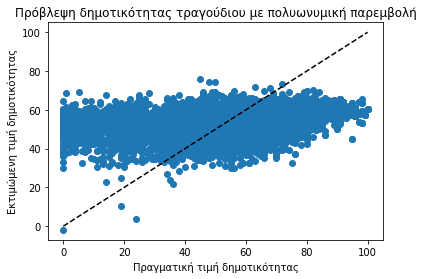

In [99]:
plt.scatter(y_test, y_pred2)

plt.plot([0, 100], [0, 100], '--k')

plt.title('Πρόβλεψη δημοτικότητας τραγούδιου με πολυωνυμική παρεμβολή')
plt.xlabel('Πραγματική τιμή δημοτικότητας')
plt.ylabel('Εκτιμώμενη τιμή δημοτικότητας')
plt.show()

#### Αξιολόγηση 

Με την χρήση Polynomial Regression (PNR) αυξήθηκε το r^2 στο R2 score_poly =  0.08172679992044729 μειώθηκαν τα σφάλματα άρα αύξηθηκε η ακρίβεια πρόβλεψεις δημοτικότητας σε σχέση με την γραμμική παρεμβολή, όμως ακόμα παραμένει ένα δύσκολο προβλήμα αφού η ακρίβεια είναι ακόμα πολλή μικρή.